#Step1.: Install cognitiveservices-vision-computervision if it is not installed!

In [1]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

Defaulting to user installation because normal site-packages is not writeable


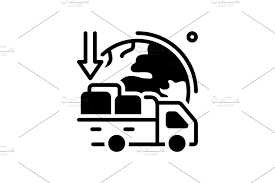

In [2]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#Step2 : Import Libraries

In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

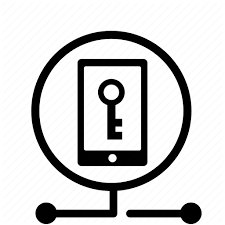

#Step3: Add your Computer Vision subscription and endpoint key

In [4]:
subscription_key='8fa5447458264d2daca1d2bc7e48e790'
endpoint='https://sunil-cv.cognitiveservices.azure.com/'
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

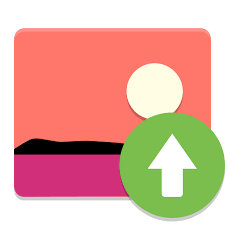

#Step4 :Upload input image

In [5]:
 remote_image_url= "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"

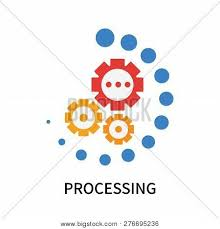

#Step5.1 : Get image description
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-describing-images


In [6]:
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url)

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'an ancient city with many ruins with Colosseum in the background' with confidence 33.80%


#Step5.2 : Get image category
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-categorizing-images

In [7]:
'''
Categorize an Image - remote
This example extracts (general) categories from a remote image with a confidence score.
'''
print("===== Categorize an image - remote =====")
# Select the visual feature(s) you want.
remote_image_features = ["categories"]
# Call API with URL and features
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

# Print results with confidence score
print("Categories from remote image: ")
if (len(categorize_results_remote.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_remote.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

===== Categorize an image - remote =====
Categories from remote image: 
'building_' with confidence 31.64%
'others_' with confidence 0.39%
'outdoor_' with confidence 3.91%


#Step5.3 : Get image tags
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-tagging-images

In [8]:
'''
Tag an Image - remote
This example returns a tag (key word) for each thing in the image.
'''
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'outdoor' with confidence 99.00%
'building' with confidence 98.81%
'sky' with confidence 98.21%
'stadium' with confidence 98.17%
'ancient rome' with confidence 96.16%
'ruins' with confidence 95.04%
'amphitheatre' with confidence 93.99%
'ancient roman architecture' with confidence 92.65%
'historic site' with confidence 89.55%
'ancient history' with confidence 89.54%
'history' with confidence 86.72%
'archaeological site' with confidence 84.41%
'travel' with confidence 65.85%
'large' with confidence 61.02%
'city' with confidence 56.57%


#Step5.5 : Detect objects
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-object-detection

In [9]:
'''
Detect Objects - remote
This example detects different kinds of objects with bounding boxes in a remote image.
'''
print("===== Detect Objects - remote =====")
# Get URL image with different objects
remote_image_url_objects = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg"
# Call API with URL
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)

# Print detected objects results with bounding boxes
print("Detecting objects in remote image:")
if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print("object name {} with confidence {:.2f}% at location {}, {}, {}, {}".format(object.object_property, object.confidence * 100, \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

===== Detect Objects - remote =====
Detecting objects in remote image:
object name shirts with confidence 60.90% at location 213, 365, 85, 208
object name Jeans with confidence 67.70% at location 218, 402, 179, 384
object name Skateboard with confidence 83.80% at location 238, 417, 298, 416
object name person with confidence 93.50% at location 116, 419, 60, 386


#Step5.6 : Detect brands
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-brand-detection

In [10]:
'''
Detect Brands - remote
This example detects common brands like logos and puts a bounding box around them.
'''
print("===== Detect Brands - remote =====")
# Get a URL with a brand logo
remote_image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"
# Select the visual feature(s) you want
remote_image_features = ["brands"]
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

===== Detect Brands - remote =====
Detecting brands in remote image: 
'Microsoft' brand detected with confidence 62.5% at location 58, 113, 106, 152
'Microsoft' brand detected with confidence 69.8% at location 58, 260, 86, 149


#Step5.7 : Detect faces
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-detecting-faces

In [11]:
'''
Detect Faces - remote
This example detects faces in a remote image, gets their gender and age, 
and marks them with a bounding box.
'''
print("===== Detect Faces - remote =====")
# Get an image with faces
remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"

#import requests
#from io import BytesIO

#response = requests.get(remote_image_url_faces)
#im = Image.open(BytesIO(response.content))
#im.show()


# Select the visual feature(s) you want.
remote_image_features = ["faces"]
# Call the API with remote URL and features
detect_faces_results_remote = computervision_client.analyze_image(remote_image_url_faces, remote_image_features)

# Print the results with gender, age, and bounding box
print("Faces in the remote image: ")
if (len(detect_faces_results_remote.faces) == 0):
    print("No faces detected.")
else:
    for face in detect_faces_results_remote.faces:
        print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))

===== Detect Faces - remote =====
Faces in the remote image: 
'None' of age None at location 118, 159, 212, 253
'None' of age None at location 492, 111, 582, 201
'None' of age None at location 18, 153, 102, 237
'None' of age None at location 386, 166, 467, 247
'None' of age None at location 235, 158, 311, 234
'None' of age None at location 323, 163, 391, 231


#Step5.8 : Detect adult, racy, or gory content
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-detecting-adult-content

In [12]:
'''
Detect Adult or Racy Content - remote
This example detects adult or racy content in a remote image, then prints the adult/racy score.
The score is ranged 0.0 - 1.0 with smaller numbers indicating negative results.
'''
print("===== Detect Adult or Racy Content - remote =====")
# Select the visual feature(s) you want
remote_image_features = ["adult"]
# Call API with URL and features
detect_adult_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results with adult/racy score
print("Analyzing remote image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_adult_content, detect_adult_results_remote.adult.adult_score * 100))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_racy_content, detect_adult_results_remote.adult.racy_score * 100))

===== Detect Adult or Racy Content - remote =====
Analyzing remote image for adult or racy content ... 
Is adult content: False with confidence 0.66
Has racy content: False with confidence 0.83


#Step5.9 : Get image color scheme
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-detecting-color-schemes

In [13]:
'''
Detect Color - remote
This example detects the different aspects of its color scheme in a remote image.
'''
remote_image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"
print("===== Detect Color - remote =====")
# Select the feature(s) you want
remote_image_features = ["color"]
# Call API with URL and features
detect_color_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results of color scheme
print("Getting color scheme of the remote image: ")
print("Is black and white: {}".format(detect_color_results_remote.color.is_bw_img))
print("Accent color: {}".format(detect_color_results_remote.color.accent_color))
print("Dominant background color: {}".format(detect_color_results_remote.color.dominant_color_background))
print("Dominant foreground color: {}".format(detect_color_results_remote.color.dominant_color_foreground))
print("Dominant colors: {}".format(detect_color_results_remote.color.dominant_colors))

===== Detect Color - remote =====
Getting color scheme of the remote image: 
Is black and white: False
Accent color: AD5D1E
Dominant background color: Grey
Dominant foreground color: Grey
Dominant colors: ['Grey']


#Step5.10 : Get domain-specific content
https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-detecting-domain-content

In [14]:
'''
Detect Domain-specific Content - remote
This example detects celebrites and landmarks in remote images.
'''
print("===== Detect Domain-specific Content - remote =====")
# URL of one or more celebrities
remote_image_url_celebs = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
# Call API with content type (celebrities) and URL
detect_domain_results_celebs_remote = computervision_client.analyze_image_by_domain("celebrities", remote_image_url_celebs)

# Print detection results with name
print("Celebrities in the remote image:")
if len(detect_domain_results_celebs_remote.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_remote.result["celebrities"]:
        print(celeb["name"])

===== Detect Domain-specific Content - remote =====


ComputerVisionErrorResponseException: (InvalidRequest) Feature is not supported. Please apply for access at https://aka.ms/celebrityrecognition

#Step5.11 : Get the image type


In [25]:
'''
Detect Image Types - remote
This example detects an image's type (clip art/line drawing).
'''
print("===== Detect Image Types - remote =====")
# Get URL of an image with a type
remote_image_url_type = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/type-image.jpg"
# Select visual feature(s) you want
remote_image_features = [VisualFeatureTypes.image_type]
# Call API with URL and features
detect_type_results_remote = computervision_client.analyze_image(remote_image_url_type, remote_image_features)

# Prints type results with degree of accuracy
print("Type of remote image:")
if detect_type_results_remote.image_type.clip_art_type == 0:
    print("Image is not clip art.")
elif detect_type_results_remote.image_type.line_drawing_type == 1:
    print("Image is ambiguously clip art.")
elif detect_type_results_remote.image_type.line_drawing_type == 2:
    print("Image is normal clip art.")
else:
    print("Image is good clip art.")

if detect_type_results_remote.image_type.line_drawing_type == 0:
    print("Image is not a line drawing.")
else:
    print("Image is a line drawing")

===== Detect Image Types - remote =====
Type of remote image:
Image is good clip art.
Image is not a line drawing.


#Step6 : Read printed and handwritten text

#Step6.1 : Call the API

In [23]:
'''
Batch Read File, recognize printed text - remote
This example will extract printed text in an image, then print results, line by line.
This API call can also recognize handwriting (not shown).
'''
print("===== Batch Read File - remote =====")
# Get an image with printed text
remote_image_printed_text_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/printed_text.jpg"

# Call API with URL and raw response (allows you to get the operation location)
recognize_printed_results = computervision_client.batch_read_file(remote_image_printed_text_url,  raw=True)


===== Batch Read File - remote =====


AttributeError: 'ComputerVisionClient' object has no attribute 'batch_read_file'

#Step6.2 : Get Read results

In [24]:
# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_printed_results.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    get_printed_text_results = computervision_client.get_read_operation_result(operation_id)
    if get_printed_text_results.status not in ['NotStarted', 'Running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if get_printed_text_results.status == TextOperationStatusCodes.succeeded:
    for text_result in get_printed_text_results.recognition_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

NameError: name 'recognize_printed_results' is not defined